In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/abhishektiwari/Downloads/tmpadpm0h5c.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312342 entries, 0 to 312341
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            312342 non-null  object 
 1   violation_type  312342 non-null  object 
 2   description     312329 non-null  object 
 3   address         312342 non-null  object 
 4   neighborhood    312329 non-null  object 
 5   zip_code        312342 non-null  int64  
 6   parcel          312342 non-null  int64  
 7   owner           312342 non-null  object 
 8   year built      310285 non-null  float64
 9   year remodeled  204322 non-null  float64
 10  property_type   312342 non-null  object 
 11  latitude        312342 non-null  float64
 12  longitude       312342 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 31.0+ MB


In [5]:
data

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2023-04-04 00:00:00,Enforcement Violations,Improper storage trash: res,"157 River St, 02126",Mattapan,2126,1800074000,CONNELLY STEVEN A,1905.0,2009.0,Residential 3-family,42.27182,-71.07779
1,2023-04-04 00:00:00,Enforcement Violations,Improper storage trash: res,"86 Chandler St, 02116",Boston,2116,500983000,EIGHTY SIX CHANDLER,1999.0,1999.0,Condominium Main*,42.34640,-71.07249
2,2023-04-04 00:00:00,Enforcement Violations,Improper storage trash: res,"451-453 Massachusetts Ave, 02118",Roxbury,2118,900965010,FOUR 51-453 MASSACHUSETTS,1999.0,1999.0,Condominium Main*,42.34023,-71.08165
3,2023-04-04 00:00:00,Enforcement Violations,Maint a dumpster wopermit,"520 E Broadway, 02127",South Boston,2127,603010000,RANS LOWELL MAX JR,1890.0,2004.0,Residential 2-family,42.33568,-71.04345
4,2023-04-04 00:00:00,Enforcement Violations,Improper storage trash: res,"107B Lawn St, 02120",Mission Hill,2120,1001566500,BACK OF THE HILL CONDO TRUST,1999.0,1999.0,Condominium Main*,42.32779,-71.10768
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312337,2018-05-01 10:31:59.063,Sanitation Requests,Rodent Activity,"398 Marlborough St, 02115",Boston,2115,503601000,THREE 98 MARLBOROUGH,1999.0,1999.0,Condominium Main*,42.35009,-71.08810
312338,2018-05-01 10:28:37.147,Sanitation Requests,Rodent Activity,"396 Marlborough St, 02115",Boston,2115,503602000,THREE 96 MARLBOROUGH ST CONDO ASSN,1999.0,1999.0,Condominium Main*,42.35011,-71.08801
312339,2018-05-01 10:26:45.807,Sanitation Requests,Rodent Activity,"394 Marlborough St, 02115",Boston,2115,503603000,THREE 94 MARLBOROUGH ST CONDO TR,1999.0,1999.0,Condominium Main*,42.35013,-71.08793
312340,2018-05-01 10:18:00,Sanitation Requests,Rodent Activity,"36 Crestwood Park # 1, 02119",Roxbury,2119,1203436000,MARKSDALE GARDENS COOP CORP,1970.0,2011.0,Residential 7 or more units,42.31810,-71.08776


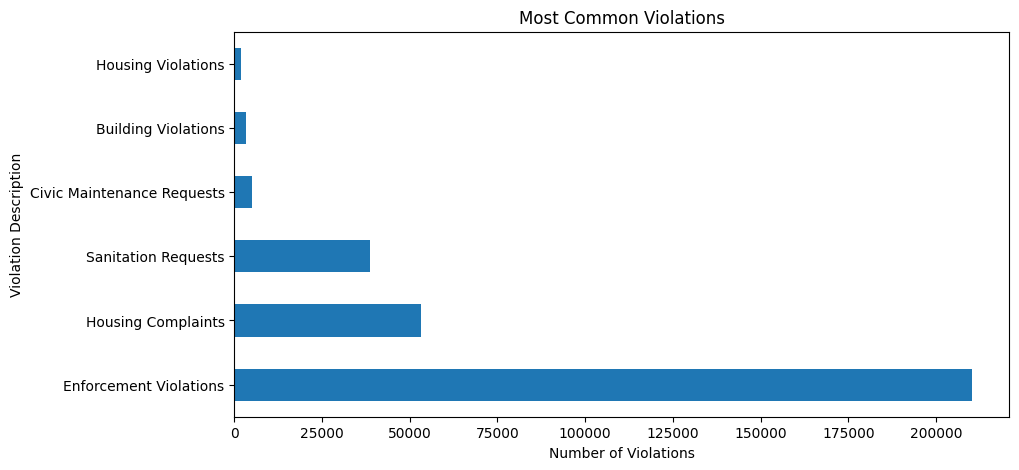

In [6]:
#plot the most common violations per neighborhood
data['violation_type'].value_counts().head(10).plot(kind='barh', figsize=(10,5))
plt.xlabel("Number of Violations")
plt.ylabel("Violation Description")
plt.title("Most Common Violations")
plt.show()


Text(0.5, 1.0, 'Most Common Enforcement Violations')

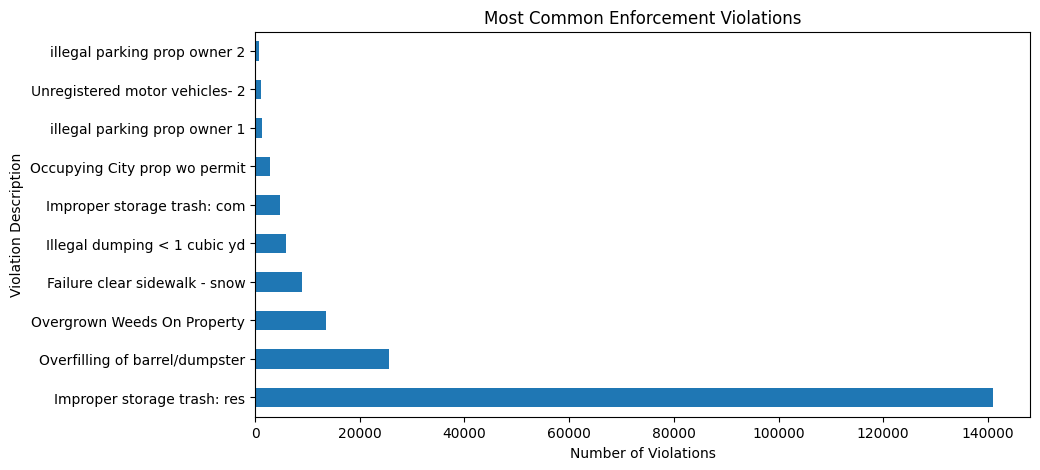

In [7]:
#plot the top 10 most common descriptions for Enforcement Violations
data[data['violation_type'] == 'Enforcement Violations'].groupby('description').size().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5))
plt.xlabel("Number of Violations")
plt.ylabel("Violation Description")
plt.title("Most Common Enforcement Violations")

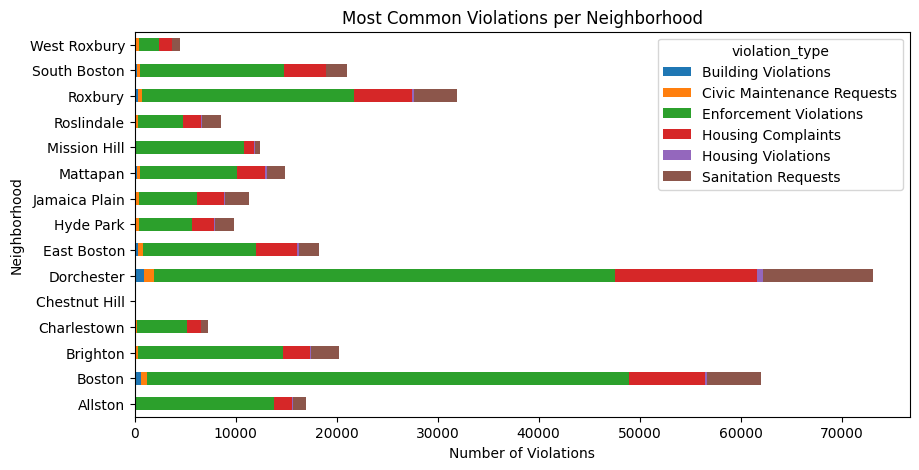

In [8]:
#do the same for the most common violations per neighborhood
figure, ax = plt.subplots(figsize=(10,5))
data.groupby(['neighborhood','violation_type']).size().unstack().plot(kind='barh', stacked=True, ax=ax)
plt.xlabel("Number of Violations")
plt.ylabel("Neighborhood")
plt.title("Most Common Violations per Neighborhood")
plt.show()



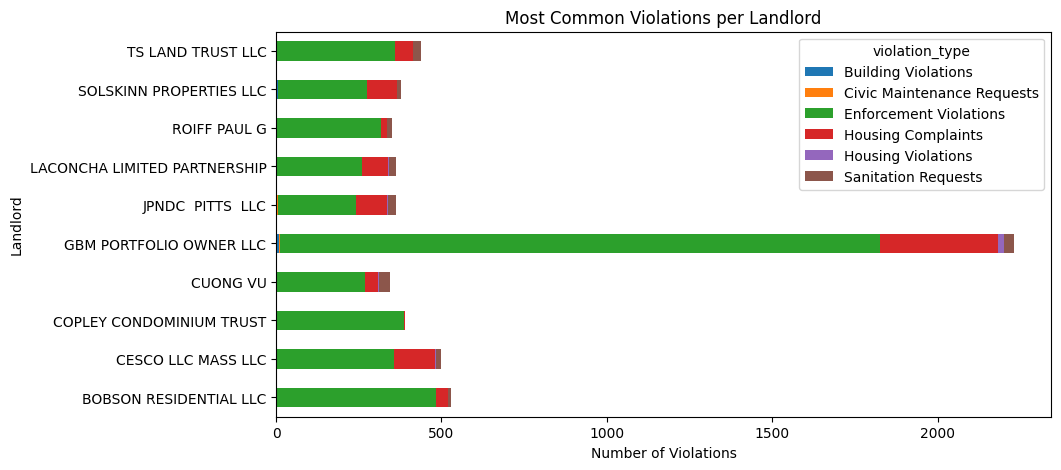

In [9]:
#Do the above analysis for the most common violations per landlord for the top 10 landlords
figure, ax = plt.subplots(figsize=(10,5))
#select the top 10 landlords
top_landlords = data['owner'].value_counts().head(10).index.tolist()
#select the data for the top 10 landlords
data_top_landlords = data[data['owner'].isin(top_landlords)]
data_top_landlords.groupby(['owner','violation_type']).size().unstack().plot(kind='barh', stacked=True, ax=ax)
plt.xlabel("Number of Violations")
plt.ylabel("Landlord")
plt.title("Most Common Violations per Landlord")
plt.show()


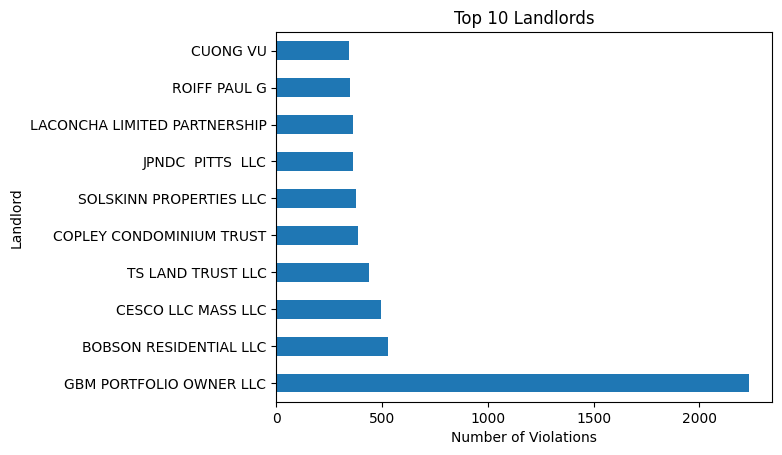

In [10]:
#print top 10 owners
data['owner'].value_counts().head(10).plot(kind='barh')
plt.xlabel("Number of Violations")
plt.ylabel("Landlord")
plt.title("Top 10 Landlords")
plt.show()



In [11]:
demographic_data = pd.read_csv('/Users/abhishektiwari/Desktop/sem2/CS506/code/ds-councilor-breadon-bad-landlords2/spring23-team-2/data/2015-2019_neighborhood_tables_2021.12.21/Age-Table 1.csv')

In [12]:
demographic_data

,Neighborhood,Total Population,Median Age,0-9 years,09_per,10-17 years,1017_per,18-19 years,1819_per,20-34 years,2034_per,35-59 years,3559_per,60 and over,60_per
0,Allston,"19,261",27.5,409,2.1%,331,1.7%,"2,359",12.2%,"13,046",67.7%,"2,307",12.0%,809,4.2%
1,Back Bay,"17,783",33.6,655,3.7%,514,2.9%,980,5.5%,"7,418",41.7%,"4,893",27.5%,"3,323",18.7%
2,Beacon Hill,"9,648",33.0,615,6.4%,247,2.6%,40,0.4%,"4,524",46.9%,"2,540",26.3%,"1,682",17.4%
3,Brighton,"55,297",30.8,"3,170",5.7%,"2,105",3.8%,"1,450",2.6%,"29,181",52.8%,"11,485",20.8%,"7,906",14.3%
4,Charlestown,"19,890",35.7,"2,978",15.0%,996,5.0%,186,0.9%,"5,603",28.2%,"6,824",34.3%,"3,303",16.6%
5,Dorchester,"126,909",33.4,"15,104",11.9%,"13,018",10.3%,"3,478",2.7%,"35,771",28.2%,"38,890",30.6%,"20,648",16.3%
6,Downtown,"18,306",33.5,"1,122",6.1%,385,2.1%,"2,307",12.6%,"5,942",32.5%,"4,923",26.9%,"3,627",19.8%
7,East Boston,"47,263",30.6,"5,319",11.3%,"3,857",8.2%,"1,086",2.3%,"14,689",31.1%,"16,270",34.4%,"6,042",12.8%
8,Fenway,"33,489",26.3,509,1.5%,190,0.6%,"8,496",25.4%,"18,072",54.0%,"3,981",11.9%,"2,241",6.7%
9,Hyde Park,"38,924",39.4,"4,140",10.6%,"4,148",10.7%,606,1.6%,"8,221",21.1%,"13,392",34.4%,"8,417",21.6%


In [13]:
#get data points for each neighborhood from data table
per_neighborhood = data['neighborhood'].value_counts().to_frame().reset_index()

In [14]:
per_neighborhood = pd.merge(per_neighborhood, demographic_data, left_on='index', right_on='Neighborhood')

In [15]:
per_neighborhood = per_neighborhood[['index', 'neighborhood', 'Total Population']]

In [16]:
#group by the data dataframe by neighborhood
data_by_neighborhood = data.groupby('neighborhood').median().reset_index()
#rename the neighborhood column to match the demographic data
data_by_neighborhood = data_by_neighborhood.rename(columns={'neighborhood': 'Neighborhood'})

/var/folders/1b/_v8pf4v97tgfz6kktgdtr2300000gn/T/ipykernel_22470/425374744.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_by_neighborhood = data.groupby('neighborhood').median().reset_index()


In [17]:
per_neighborhood = per_neighborhood.reset_index(drop=True)
per_neighborhood = per_neighborhood.rename(columns={'index': 'Neighborhood'})
#add the latitudes and longitudes to the per_neighborhood dataframe, merge on neighborhood
per_neighborhood = pd.merge(per_neighborhood, data_by_neighborhood, on='Neighborhood')


In [18]:
per_neighborhood

,Neighborhood,neighborhood,Total Population,zip_code,parcel,year built,year remodeled,latitude,longitude
0,Dorchester,73098,"126,909",2124.0,1.404612e+09,1905.0,2003.0,42.302500,-71.069920
1,Roxbury,31890,"54,161",2118.0,9.003170e+08,1900.0,2002.0,42.335794,-71.078355
2,South Boston,21057,"36,772",2127.0,6.039050e+08,1900.0,2004.0,42.334510,-71.043790
3,Brighton,20197,"55,297",2135.0,2.202320e+09,1920.0,1999.0,42.345871,-71.152430
4,East Boston,18271,"47,263",2128.0,1.039720e+08,1900.0,2004.0,42.377680,-71.033500
5,Allston,16963,"19,261",2134.0,2.101024e+09,1911.0,1999.0,42.353490,-71.131240
6,Mattapan,14907,"26,659",2126.0,1.800730e+09,1920.0,1998.0,42.276050,-71.092850
7,Jamaica Plain,11293,"40,867",2130.0,1.102957e+09,1910.0,2000.0,42.313112,-71.108620
8,Hyde Park,9811,"38,924",2136.0,1.809424e+09,1925.0,1990.0,42.256640,-71.122010
9,Roslindale,8534,"30,021",2131.0,1.903317e+09,1920.0,2001.0,42.284630,-71.126700


In [19]:
per_neighborhood.rename(columns={'index': 'Neighborhood', 'neighborhood': 'Number of Complaints'}, inplace=True)

In [20]:
per_neighborhood['Total Population'] = per_neighborhood['Total Population'].str.replace(',', '').astype(int)

In [21]:
per_neighborhood['complaints_per_pop'] = per_neighborhood['Number of Complaints']/per_neighborhood['Total Population']

In [22]:
per_neighborhood

,Neighborhood,Number of Complaints,Total Population,zip_code,parcel,year built,year remodeled,latitude,longitude,complaints_per_pop
0,Dorchester,73098,126909,2124.0,1.404612e+09,1905.0,2003.0,42.302500,-71.069920,0.575988
1,Roxbury,31890,54161,2118.0,9.003170e+08,1900.0,2002.0,42.335794,-71.078355,0.588800
2,South Boston,21057,36772,2127.0,6.039050e+08,1900.0,2004.0,42.334510,-71.043790,0.572637
3,Brighton,20197,55297,2135.0,2.202320e+09,1920.0,1999.0,42.345871,-71.152430,0.365246
4,East Boston,18271,47263,2128.0,1.039720e+08,1900.0,2004.0,42.377680,-71.033500,0.386581
5,Allston,16963,19261,2134.0,2.101024e+09,1911.0,1999.0,42.353490,-71.131240,0.880692
6,Mattapan,14907,26659,2126.0,1.800730e+09,1920.0,1998.0,42.276050,-71.092850,0.559173
7,Jamaica Plain,11293,40867,2130.0,1.102957e+09,1910.0,2000.0,42.313112,-71.108620,0.276335
8,Hyde Park,9811,38924,2136.0,1.809424e+09,1925.0,1990.0,42.256640,-71.122010,0.252055
9,Roslindale,8534,30021,2131.0,1.903317e+09,1920.0,2001.0,42.284630,-71.126700,0.284268


In [23]:
#plot the complaints per population as circles on a map, with the size of the circle representing the number of complaints

import folium
from folium.plugins import HeatMap

# Create a map
m_1 = folium.Map(location=[42.3601, -71.0589], tiles='cartodbpositron', zoom_start=12)

# Add points to the map
for idx, row in per_neighborhood.iterrows():
    Marker = folium.CircleMarker([row['latitude'], row['longitude']], radius=row['complaints_per_pop']*50, color='#3186cc', fill_color='#3186cc')
    Marker.add_to(m_1)

# Display the map
m_1



In [24]:
#Also plot the complaints per population as a heatmap
m_2 = folium.Map(location=[42.3601, -71.0589], tiles='cartodbpositron', zoom_start=12)

# Add points to the map
HeatMap(data=per_neighborhood[['latitude', 'longitude', 'complaints_per_pop']], radius=100).add_to(m_2)

# Display the map
m_2

In [25]:
#group the data column by neighborhood 
data_by_neighborhood = data.groupby('neighborhood').count().reset_index()


<AxesSubplot: xlabel='Neighborhood'>

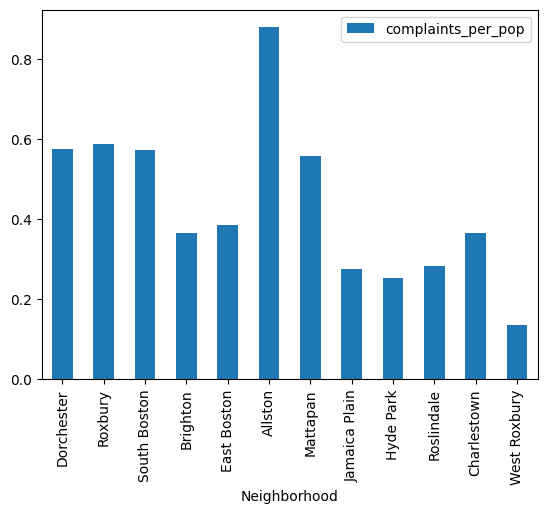

In [26]:
#plot bar graph of complaints per population
per_neighborhood.plot.bar(x='Neighborhood', y='complaints_per_pop', rot=90)


In [27]:
evictions_df = pd.read_csv('/Users/abhishektiwari/Desktop/sem2/CS506/code/Eviction_Filings_Boston_Neighborhood_Data.csv')
evictions_df

,Neighborhood,Annual Eviction Filing Rate,Annual Market-Rate Housing Eviction Filing Rate,"% of Total Eviction Filings, as Fraction of Boston Total","% Rental Units, as Fraction of Boston Total","% of Market-Rate Eviction Filings, as Fraction of Boston Total","% Market-Rate Rental Units, as Fraction of Boston Total",% Households With Rent Burden,Median Household Income,% White,% Black,% Hispanic/Latinx,% Asian,% Other
0,Boston (Total),2.9,1.0,100.0,100.0,100.0,100.0,49.4,64264,44.9,22.7,19.3,9.4,3.1
1,Allston/Brighton,1.0,0.4,5.3,14.1,6.9,16.3,50.1,61011,62.1,4.9,11.6,17.5,3.6
2,Back Bay/Beacon Hill,0.9,0.5,1.7,5.1,3.0,6.3,39.1,106311,81.1,2.5,6.9,7.5,1.9
3,Central,0.9,0.6,3.0,8.7,5.1,9.6,44.5,88580,67.7,3.1,7.0,19.4,2.5
4,Charlestown,2.1,0.6,2.1,2.7,1.1,2.1,36.6,99287,73.2,5.8,11.8,7.2,1.7
5,Dorchester,3.6,1.6,16.0,11.7,19.9,13.2,55.5,57536,27.9,38.2,15.4,12.1,5.8
6,East Boston,1.3,0.6,3.2,6.3,3.7,6.9,49.6,51808,30.9,2.7,58.9,3.8,3.2
7,Fenway/Kenmore,1.1,0.6,3.5,8.1,5.3,9.5,54.3,35910,61.3,4.9,11.6,18.8,3.1
8,Hyde Park,3.8,2.6,3.8,2.6,5.9,2.4,49.9,71861,24.5,45.5,24.9,1.8,2.6
9,Jamaica Plain,1.9,0.6,4.8,6.8,3.2,6.1,48.4,67203,53.4,11.4,21.4,10.7,2.6


In [28]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
def merge_eviction_rate(row):
    for i in range(0, len(evictions_df)):
        if fuzz.partial_ratio(row['Neighborhood'], evictions_df['Neighborhood'][i]) > 70:
            return evictions_df['Annual Eviction Filing Rate'][i]
        
per_neighborhood['Eviction Rate'] = per_neighborhood.apply(merge_eviction_rate, axis=1)


/Users/abhishektiwari/Desktop/sem2/college_env/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [29]:
#create a df with only rows that have eviction rate > 4
per_neighborhood_high_org = per_neighborhood[per_neighborhood['Eviction Rate'] > 0.5]
per_neighborhood_high = per_neighborhood[per_neighborhood['Eviction Rate'] > 0.5]

In [30]:
per_neighborhood_high_org.loc[per_neighborhood_high_org['Neighborhood'] == 'West Roxbury', 'Eviction Rate'] = 4.6
per_neighborhood_high.loc[per_neighborhood_high['Neighborhood'] == 'West Roxbury', 'Eviction Rate'] = 4.6

In [31]:
per_neighborhood_high = pd.merge(per_neighborhood_high, demographic_data, left_on='Neighborhood', right_on='Neighborhood')


In [32]:
per_neighborhood_high.drop(['Total Population_x'], axis=1, inplace=True)

In [33]:
per_neighborhood_high

,Neighborhood,Number of Complaints,zip_code,parcel,year built,year remodeled,latitude,longitude,complaints_per_pop,Eviction Rate,...,10-17 years,1017_per,18-19 years,1819_per,20-34 years,2034_per,35-59 years,3559_per,60 and over,60_per
0,Dorchester,73098,2124.0,1.404612e+09,1905.0,2003.0,42.302500,-71.069920,0.575988,3.6,...,"13,018",10.3%,"3,478",2.7%,"35,771",28.2%,"38,890",30.6%,"20,648",16.3%
1,Roxbury,31890,2118.0,9.003170e+08,1900.0,2002.0,42.335794,-71.078355,0.588800,6.7,...,"5,289",9.8%,"2,669",4.9%,"15,059",27.8%,"15,564",28.7%,"9,023",16.7%
2,South Boston,21057,2127.0,6.039050e+08,1900.0,2004.0,42.334510,-71.043790,0.572637,1.3,...,"1,496",4.1%,305,0.8%,"16,937",46.1%,"10,206",27.8%,"4,663",12.7%
3,Brighton,20197,2135.0,2.202320e+09,1920.0,1999.0,42.345871,-71.152430,0.365246,1.0,...,"2,105",3.8%,"1,450",2.6%,"29,181",52.8%,"11,485",20.8%,"7,906",14.3%
4,East Boston,18271,2128.0,1.039720e+08,1900.0,2004.0,42.377680,-71.033500,0.386581,1.3,...,"3,857",8.2%,"1,086",2.3%,"14,689",31.1%,"16,270",34.4%,"6,042",12.8%
5,Allston,16963,2134.0,2.101024e+09,1911.0,1999.0,42.353490,-71.131240,0.880692,1.0,...,331,1.7%,"2,359",12.2%,"13,046",67.7%,"2,307",12.0%,809,4.2%
6,Mattapan,14907,2126.0,1.800730e+09,1920.0,1998.0,42.276050,-71.092850,0.559173,6.8,...,"3,072",11.5%,575,2.2%,"5,582",20.9%,"9,031",33.9%,"4,903",18.4%
7,Jamaica Plain,11293,2130.0,1.102957e+09,1910.0,2000.0,42.313112,-71.108620,0.276335,1.9,...,"2,389",5.8%,674,1.6%,"13,286",32.5%,"13,387",32.8%,"6,899",16.9%
8,Hyde Park,9811,2136.0,1.809424e+09,1925.0,1990.0,42.256640,-71.122010,0.252055,3.8,...,"4,148",10.7%,606,1.6%,"8,221",21.1%,"13,392",34.4%,"8,417",21.6%
9,Roslindale,8534,2131.0,1.903317e+09,1920.0,2001.0,42.284630,-71.126700,0.284268,2.0,...,"2,567",8.6%,555,1.8%,"6,310",21.0%,"11,224",37.4%,"5,953",19.8%


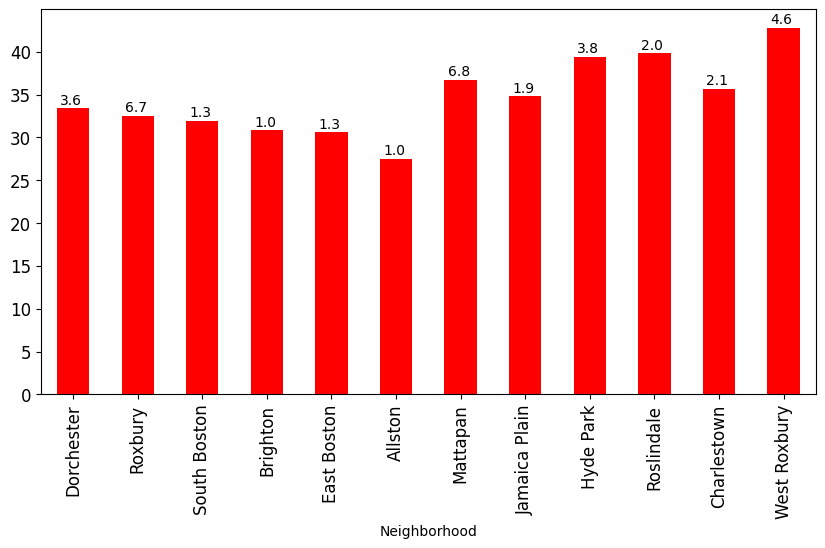

In [34]:
#plot the median age of neighborhoods with high eviction rate, put the eviction rate value on top of the bar
per_neighborhood_high.plot.bar(x='Neighborhood', y='Median Age', rot=90, figsize=(10, 5), color='red', fontsize=12, legend=False)
#To the above plot, add the eviction rate value on top of the bar
for i in range(0, len(per_neighborhood_high)):
    plt.text(x=i-0.2 , y = per_neighborhood_high['Median Age'][i]+0.5, s = per_neighborhood_high['Eviction Rate'][i], size = 10)

    

In [35]:

# #for columns that have commas, remove them first
# per_neighborhood_high['Total Population_y'] = per_neighborhood_high['Total Population_y'].str.replace(',', '').astype(int)
# per_neighborhood_high['0-9 years'] = per_neighborhood_high['0-9 years'].str.replace(',', '').astype(int)
# per_neighborhood_high['10-17 years'] = per_neighborhood_high['10-17 years'].str.replace(',', '').astype(int)
# per_neighborhood_high['18-19 years'] = per_neighborhood_high['18-19 years'].str.replace(',', '').astype(int)
# per_neighborhood_high['20-34 years'] = per_neighborhood_high['20-34 years'].str.replace(',', '').astype(int)
# per_neighborhood_high['35-59 years'] = per_neighborhood_high['35-59 years'].str.replace(',', '').astype(int)
# per_neighborhood_high['60 and over'] = per_neighborhood_high['60 and over'].str.replace(',', '').astype(int)

# #drop the above columns
# per_neighborhood_high.drop(['Total Population_y', '0-9 years', '10-17 years', '18-19 years', '20-34 years', '35-59 years', '60 and over'], axis=1, inplace=True)




In [36]:
#for columns that are percentages, remove the % sign and convert to float
per_neighborhood_high['09_per'] = per_neighborhood_high['09_per'].str.replace('%', '').astype(float)
per_neighborhood_high['1017_per'] = per_neighborhood_high['1017_per'].str.replace('%', '').astype(float)
per_neighborhood_high['1819_per'] = per_neighborhood_high['1819_per'].str.replace('%', '').astype(float)
per_neighborhood_high['2034_per'] = per_neighborhood_high['2034_per'].str.replace('%', '').astype(float)
per_neighborhood_high['3559_per'] = per_neighborhood_high['3559_per'].str.replace('%', '').astype(float)
per_neighborhood_high['60_per'] = per_neighborhood_high['60_per'].str.replace('%', '').astype(float)


/var/folders/1b/_v8pf4v97tgfz6kktgdtr2300000gn/T/ipykernel_22470/1379831988.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = per_neighborhood_high.corr()


<AxesSubplot: >

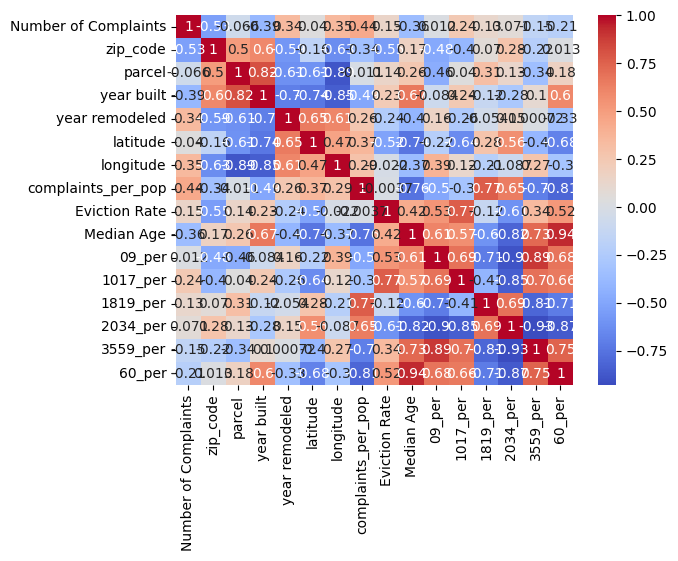

In [37]:

#plot the correlation matrix
import seaborn as sns
corr = per_neighborhood_high.corr()
sns.heatmap(corr , annot=True, cmap='coolwarm')

In [38]:
education_df = pd.read_csv('/Users/abhishektiwari/Desktop/sem2/CS506/code/ds-councilor-breadon-bad-landlords2/spring23-team-2/data/2015-2019_neighborhood_tables_2021.12.21/Educational Attainment-Table 1.csv')
education_df

,Neighborhood,Total population 25 years and over,Less than High School,%,High School Graduate,%.1,GED or Alternative Credential,%.2,Some College,%.3,...,%.7,High School Graduate/GED or Alternative Credential,%.8,Some College/Associate's Degree,%.9,Bachelor's Degree.1,%.10,Master's Degree or more.1,%.11,Unnamed: 29
0,Allston,"10,432",571,5.5%,701,6.7%,72,0.7%,886,8.5%,...,5.5%,773,7.4%,"1,244",11.9%,"4,338",41.6%,"3,506",33.6%,NaN
1,Back Bay,"13,791",284,2.1%,565,4.1%,31,0.2%,690,5.0%,...,2.1%,596,4.3%,"1,130",8.2%,"5,396",39.1%,"6,385",46.3%,NaN
2,Beacon Hill,"8,203",169,2.1%,148,1.8%,20,0.2%,270,3.3%,...,2.1%,168,2.0%,399,4.9%,"3,815",46.5%,"3,652",44.5%,NaN
3,Brighton,"39,650","2,660",6.7%,"3,968",10.0%,709,1.8%,"4,149",10.5%,...,6.7%,"4,677",11.8%,"5,477",13.8%,"15,575",39.3%,"11,261",28.4%,NaN
4,Charlestown,"15,069","1,192",7.9%,"1,833",12.2%,229,1.5%,"1,243",8.2%,...,7.9%,"2,062",13.7%,"1,656",11.0%,"4,987",33.1%,"5,172",34.3%,NaN
5,Dorchester,"86,012","15,449",18.0%,"22,117",25.7%,"3,580",4.2%,"14,716",17.1%,...,18.0%,"25,697",29.9%,"19,657",22.9%,"16,095",18.7%,"9,114",10.6%,NaN
6,Downtown,"12,722","1,963",15.4%,"1,123",8.8%,222,1.7%,877,6.9%,...,15.4%,"1,345",10.6%,"1,399",11.0%,"3,327",26.2%,"4,688",36.8%,NaN
7,East Boston,"33,947","9,228",27.2%,"8,883",26.2%,842,2.5%,"3,900",11.5%,...,27.2%,"9,725",28.6%,"5,182",15.3%,"6,413",18.9%,"3,399",10.0%,NaN
8,Fenway,"13,202",840,6.4%,"1,017",7.7%,291,2.2%,"1,112",8.4%,...,6.4%,"1,308",9.9%,"1,495",11.3%,"4,491",34.0%,"5,068",38.4%,NaN
9,Hyde Park,"27,240","3,759",13.8%,"6,354",23.3%,"1,196",4.4%,"5,794",21.3%,...,13.8%,"7,550",27.7%,"8,210",30.1%,"5,017",18.4%,"2,704",9.9%,NaN


In [39]:
per_neighborhood_high_edu = pd.merge(per_neighborhood_high_org, education_df, left_on='Neighborhood', right_on='Neighborhood')

In [40]:
#convert all the prectentage columns (%, %.1, ... %.11) to float

per_columns = ['%.1', '%.2', '%.3', '%.4', '%.5', '%.6', '%.7', '%.8', '%.9', '%.10', '%.11']

for i in range(0, len(per_columns)):
    per_neighborhood_high_edu[per_columns[i]] = per_neighborhood_high_edu[per_columns[i]].str.replace('%', '').astype(float)

#drop the columns that are not needed


In [41]:
#drop unnamed columns
per_neighborhood_high_edu.drop(['Unnamed: 16'], axis=1, inplace=True)

In [42]:
per_neighborhood_high_edu

,Neighborhood,Number of Complaints,Total Population,zip_code,parcel,year built,year remodeled,latitude,longitude,complaints_per_pop,...,%.7,High School Graduate/GED or Alternative Credential,%.8,Some College/Associate's Degree,%.9,Bachelor's Degree.1,%.10,Master's Degree or more.1,%.11,Unnamed: 29
0,Dorchester,73098,126909,2124.0,1.404612e+09,1905.0,2003.0,42.302500,-71.069920,0.575988,...,18.0,"25,697",29.9,"19,657",22.9,"16,095",18.7,"9,114",10.6,NaN
1,Roxbury,31890,54161,2118.0,9.003170e+08,1900.0,2002.0,42.335794,-71.078355,0.588800,...,23.0,"9,902",29.5,"8,273",24.6,"5,048",15.0,"2,632",7.8,NaN
2,South Boston,21057,36772,2127.0,6.039050e+08,1900.0,2004.0,42.334510,-71.043790,0.572637,...,7.9,"4,239",14.3,"3,601",12.1,"12,856",43.2,"6,685",22.5,NaN
3,Brighton,20197,55297,2135.0,2.202320e+09,1920.0,1999.0,42.345871,-71.152430,0.365246,...,6.7,"4,677",11.8,"5,477",13.8,"15,575",39.3,"11,261",28.4,NaN
4,East Boston,18271,47263,2128.0,1.039720e+08,1900.0,2004.0,42.377680,-71.033500,0.386581,...,27.2,"9,725",28.6,"5,182",15.3,"6,413",18.9,"3,399",10.0,NaN
5,Allston,16963,19261,2134.0,2.101024e+09,1911.0,1999.0,42.353490,-71.131240,0.880692,...,5.5,773,7.4,"1,244",11.9,"4,338",41.6,"3,506",33.6,NaN
6,Mattapan,14907,26659,2126.0,1.800730e+09,1920.0,1998.0,42.276050,-71.092850,0.559173,...,14.5,"6,220",34.4,"5,539",30.6,"2,109",11.7,"1,595",8.8,NaN
7,Jamaica Plain,11293,40867,2130.0,1.102957e+09,1910.0,2000.0,42.313112,-71.108620,0.276335,...,8.0,"3,773",12.1,"4,675",15.0,"9,304",29.8,"11,003",35.2,NaN
8,Hyde Park,9811,38924,2136.0,1.809424e+09,1925.0,1990.0,42.256640,-71.122010,0.252055,...,13.8,"7,550",27.7,"8,210",30.1,"5,017",18.4,"2,704",9.9,NaN
9,Roslindale,8534,30021,2131.0,1.903317e+09,1920.0,2001.0,42.284630,-71.126700,0.284268,...,9.2,"4,656",21.2,"4,746",21.6,"5,209",23.7,"5,323",24.2,NaN


/var/folders/1b/_v8pf4v97tgfz6kktgdtr2300000gn/T/ipykernel_22470/3249513865.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = per_neighborhood_high_edu.corr()


<AxesSubplot: >

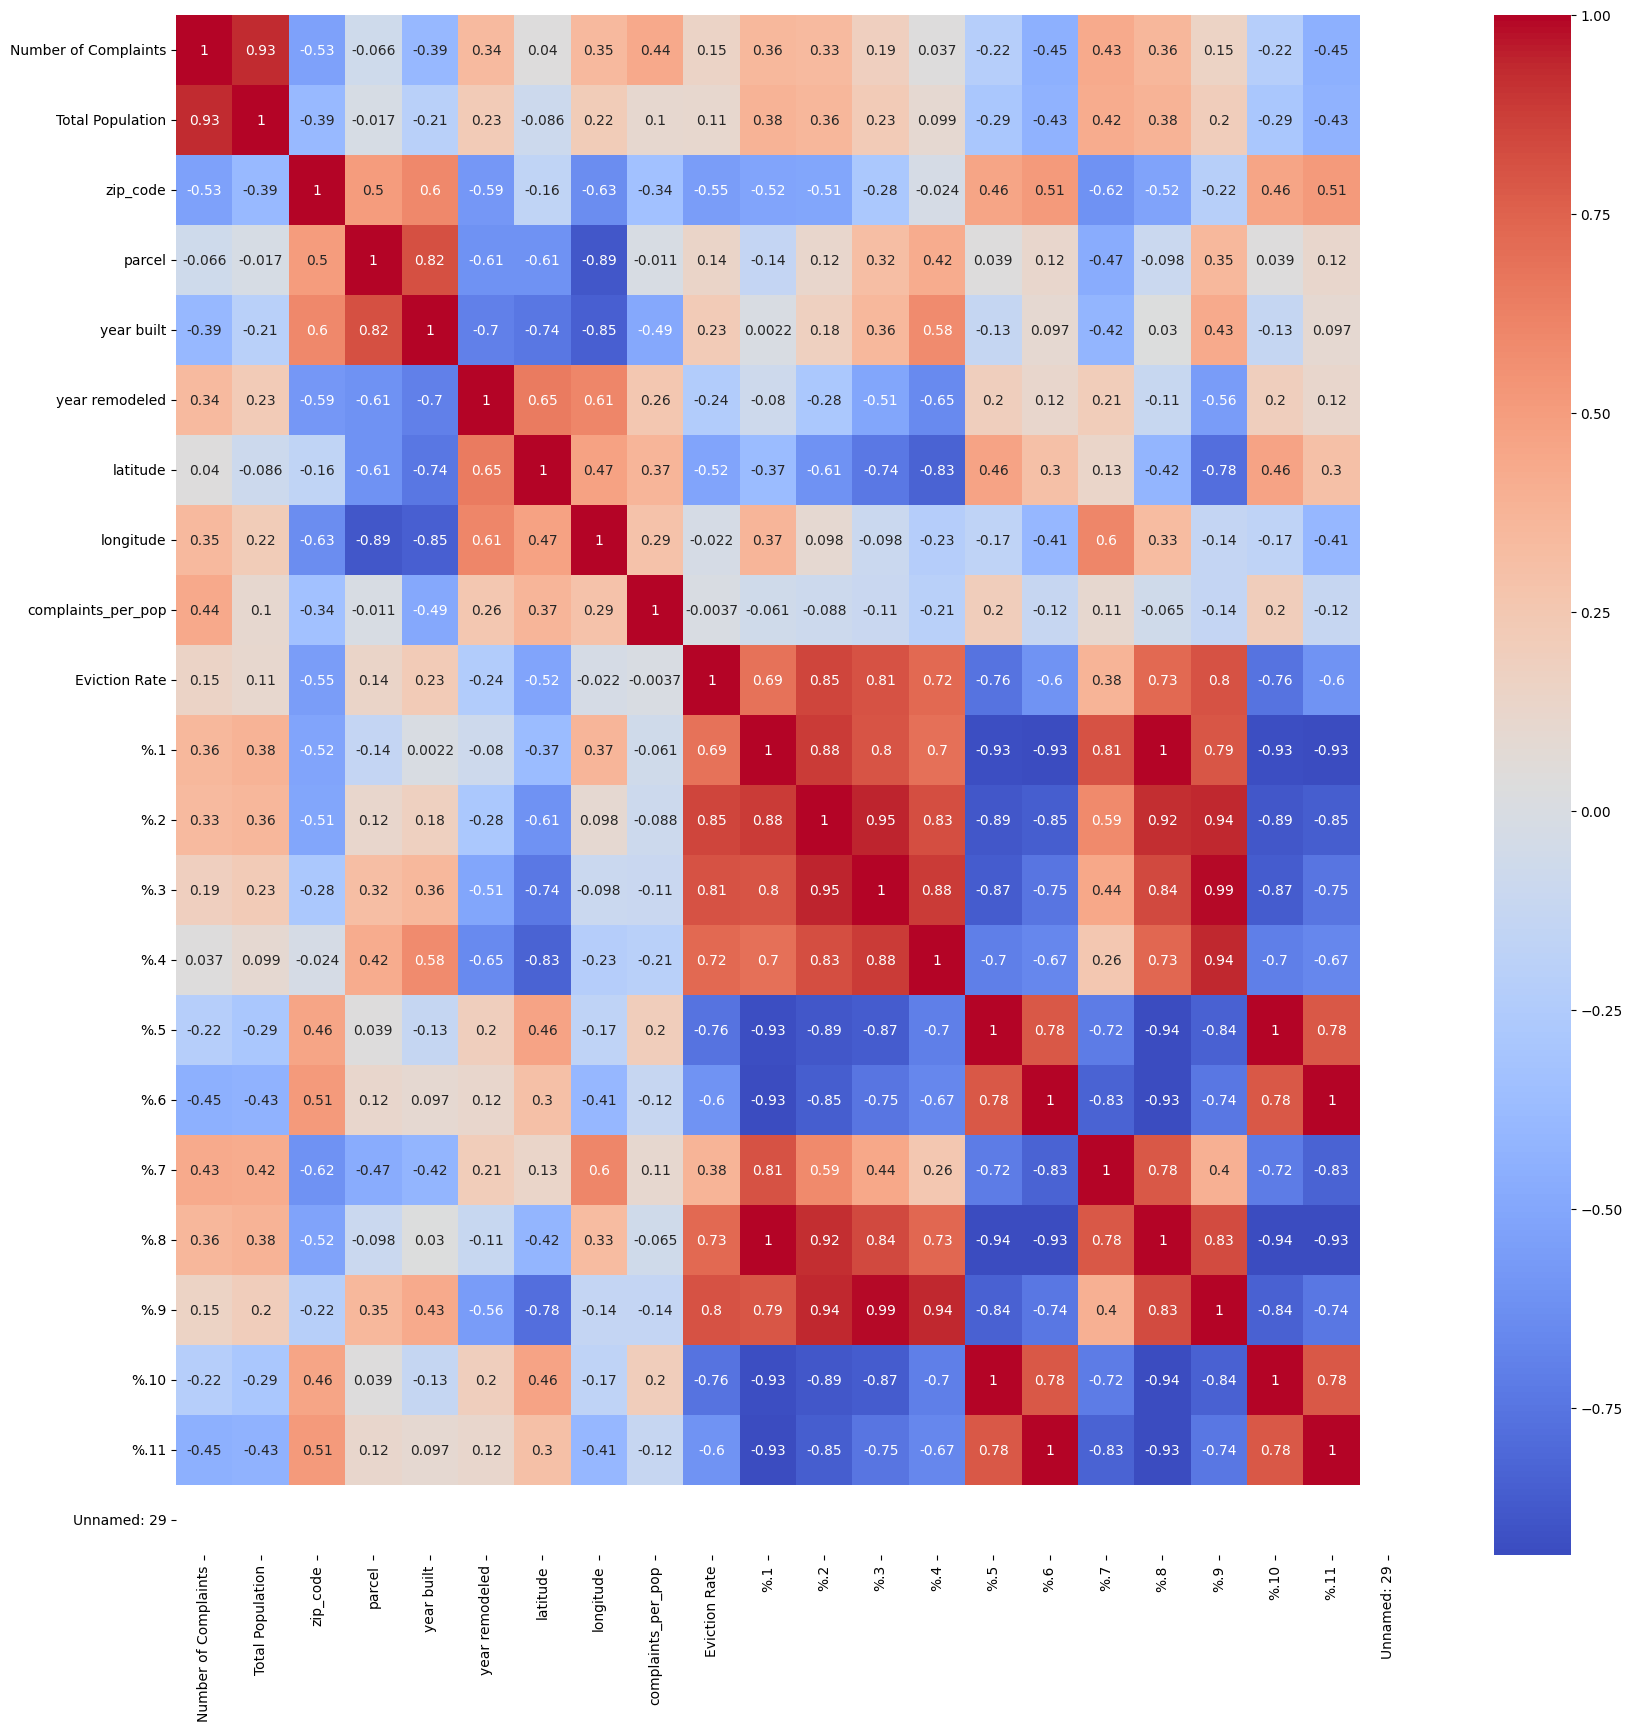

In [43]:
#plot the correlation matrix

corr = per_neighborhood_high_edu.corr()
#make the figure bigger
plt.figure(figsize=(20, 20))
sns.heatmap(corr , annot=True, cmap='coolwarm')



Text(0.5, 1.0, 'Eviction Rate vs Percentage of people between 20-34 years old')

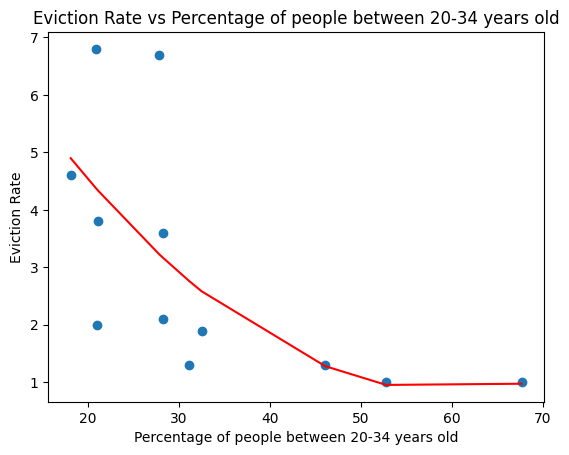

In [44]:
#fit a line to the above scatter plot
plt.plot(np.unique(per_neighborhood_high['2034_per']), np.poly1d(np.polyfit(per_neighborhood_high['2034_per'], per_neighborhood_high['Eviction Rate'], 2))(np.unique(per_neighborhood_high['2034_per'])), color='red')
#Add the scatter plot
plt.scatter(per_neighborhood_high['2034_per'], per_neighborhood_high['Eviction Rate'])
plt.xlabel('Percentage of people between 20-34 years old')
plt.ylabel('Eviction Rate')
plt.title('Eviction Rate vs Percentage of people between 20-34 years old')


Text(0.5, 1.0, "Eviction Rate vs % of Population with Bachelor's Degree or Higher")

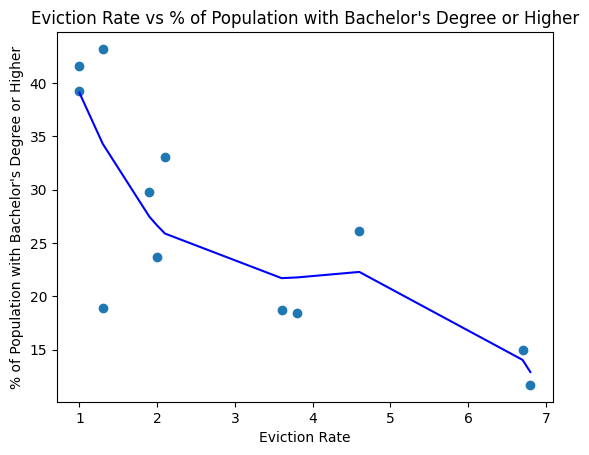

In [67]:
plt.plot(np.unique(per_neighborhood_high_edu['Eviction Rate']), np.poly1d(np.polyfit(per_neighborhood_high_edu['Eviction Rate'], per_neighborhood_high_edu['%.10'], 3))(np.unique(per_neighborhood_high_edu['Eviction Rate'])), color='blue')
#Add the scatter plot
plt.scatter(per_neighborhood_high_edu['Eviction Rate'], per_neighborhood_high_edu['%.10'])
plt.xlabel('Eviction Rate')
plt.ylabel('% of Population with Bachelor\'s Degree or Higher')
plt.title('Eviction Rate vs % of Population with Bachelor\'s Degree or Higher')



Text(0.5, 1.0, 'Complaints per Population vs Percentage of people 60 years or older')

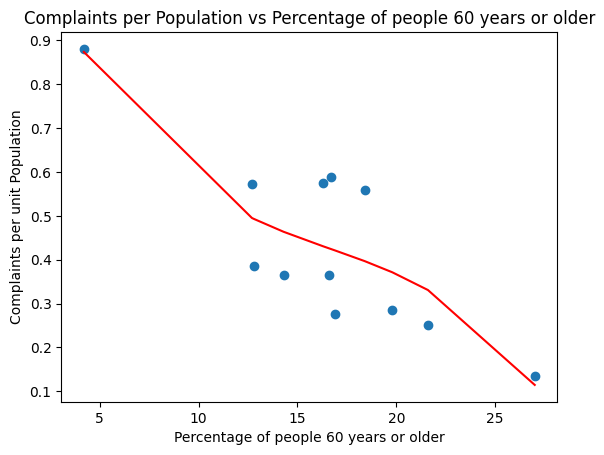

In [68]:
#plot the complaints_per_pop vs 60_per

plt.plot(np.unique(per_neighborhood_high['60_per']), np.poly1d(np.polyfit(per_neighborhood_high['60_per'], per_neighborhood_high['complaints_per_pop'], 3))(np.unique(per_neighborhood_high['60_per'])), color='red')
#Add the scatter plot
plt.scatter(per_neighborhood_high['60_per'], per_neighborhood_high['complaints_per_pop'])
plt.xlabel('Percentage of people 60 years or older')
plt.ylabel('Complaints per unit Population')
plt.title('Complaints per Population vs Percentage of people 60 years or older')



In [47]:
income_data = pd.read_csv("/Users/abhishektiwari/Desktop/sem2/CS506/code/ds-councilor-breadon-bad-landlords2/spring23-team-2/data/2015-2019_neighborhood_tables_2021.12.21/Family Income-Table_csv.csv")

In [48]:
#merge the income data with the per_neighborhood_high dataframe
per_neighborhood_high_income = pd.merge(per_neighborhood_high_org, income_data, left_on='Neighborhood', right_on='Neighborhood')

In [49]:
per_neighborhood_high_income

,Neighborhood,Number of Complaints,Total Population,zip_code,parcel,year built,year remodeled,latitude,longitude,complaints_per_pop,...,"$35,000 to $49,999",%.3,"$50,000 to $74,999",%.4,"$75,000 to $99,999",%.5,"$100,000 to $149,999",%.6,"$150,000.00",%.7
0,Dorchester,73098,126909,2124.0,1.404612e+09,1905.0,2003.0,42.302500,-71.069920,0.575988,...,"3,098",11.6%,"3,983",14.9%,"3,418",12.8%,"4,094",15.3%,"3,754",14.1%
1,Roxbury,31890,54161,2118.0,9.003170e+08,1900.0,2002.0,42.335794,-71.078355,0.588800,...,"1,501",13.7%,"1,232",11.3%,"1,052",9.6%,"1,265",11.6%,965,8.8%
2,South Boston,21057,36772,2127.0,6.039050e+08,1900.0,2004.0,42.334510,-71.043790,0.572637,...,418,6.4%,423,6.5%,408,6.3%,"1,016",15.7%,"2,506",38.6%
3,Brighton,20197,55297,2135.0,2.202320e+09,1920.0,1999.0,42.345871,-71.152430,0.365246,...,497,6.3%,"1,133",14.4%,"1,069",13.6%,"1,849",23.6%,"1,750",22.3%
4,East Boston,18271,47263,2128.0,1.039720e+08,1900.0,2004.0,42.377680,-71.033500,0.386581,...,"1,805",18.7%,"1,661",17.2%,844,8.7%,"1,502",15.5%,"1,338",13.8%
5,Allston,16963,19261,2134.0,2.101024e+09,1911.0,1999.0,42.353490,-71.131240,0.880692,...,156,9.8%,329,20.6%,191,12.0%,331,20.7%,256,16.0%
6,Mattapan,14907,26659,2126.0,1.800730e+09,1920.0,1998.0,42.276050,-71.092850,0.559173,...,739,11.7%,"1,048",16.6%,815,12.9%,"1,136",18.0%,683,10.8%
7,Jamaica Plain,11293,40867,2130.0,1.102957e+09,1910.0,2000.0,42.313112,-71.108620,0.276335,...,372,4.6%,663,8.2%,849,10.5%,"1,769",21.9%,"3,055",37.8%
8,Hyde Park,9811,38924,2136.0,1.809424e+09,1925.0,1990.0,42.256640,-71.122010,0.252055,...,714,7.6%,"1,620",17.3%,"1,300",13.9%,"1,841",19.7%,"1,937",20.7%
9,Roslindale,8534,30021,2131.0,1.903317e+09,1920.0,2001.0,42.284630,-71.126700,0.284268,...,575,8.1%,983,13.8%,828,11.6%,"1,652",23.2%,"1,912",26.9%


In [50]:
#convert columns to float
#remove $ sign and commas from Median Income and convert to float
per_neighborhood_high_income['Median Income'] = per_neighborhood_high_income['Median Income'].str.replace('$', '').str.replace(',', '').astype(float)

#remove % sign from the percentage columns [%, %.1, ... %.7] and convert to float
per_columns = ['%', '%.1', '%.2', '%.3', '%.4', '%.5', '%.6', '%.7']

for i in range(0, len(per_columns)):
    per_neighborhood_high_income[per_columns[i]] = per_neighborhood_high_income[per_columns[i]].str.replace('%', '').astype(float)

    


/var/folders/1b/_v8pf4v97tgfz6kktgdtr2300000gn/T/ipykernel_22470/252426833.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  per_neighborhood_high_income['Median Income'] = per_neighborhood_high_income['Median Income'].str.replace('$', '').str.replace(',', '').astype(float)


/var/folders/1b/_v8pf4v97tgfz6kktgdtr2300000gn/T/ipykernel_22470/1161499328.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = per_neighborhood_high_income.corr()


<AxesSubplot: >

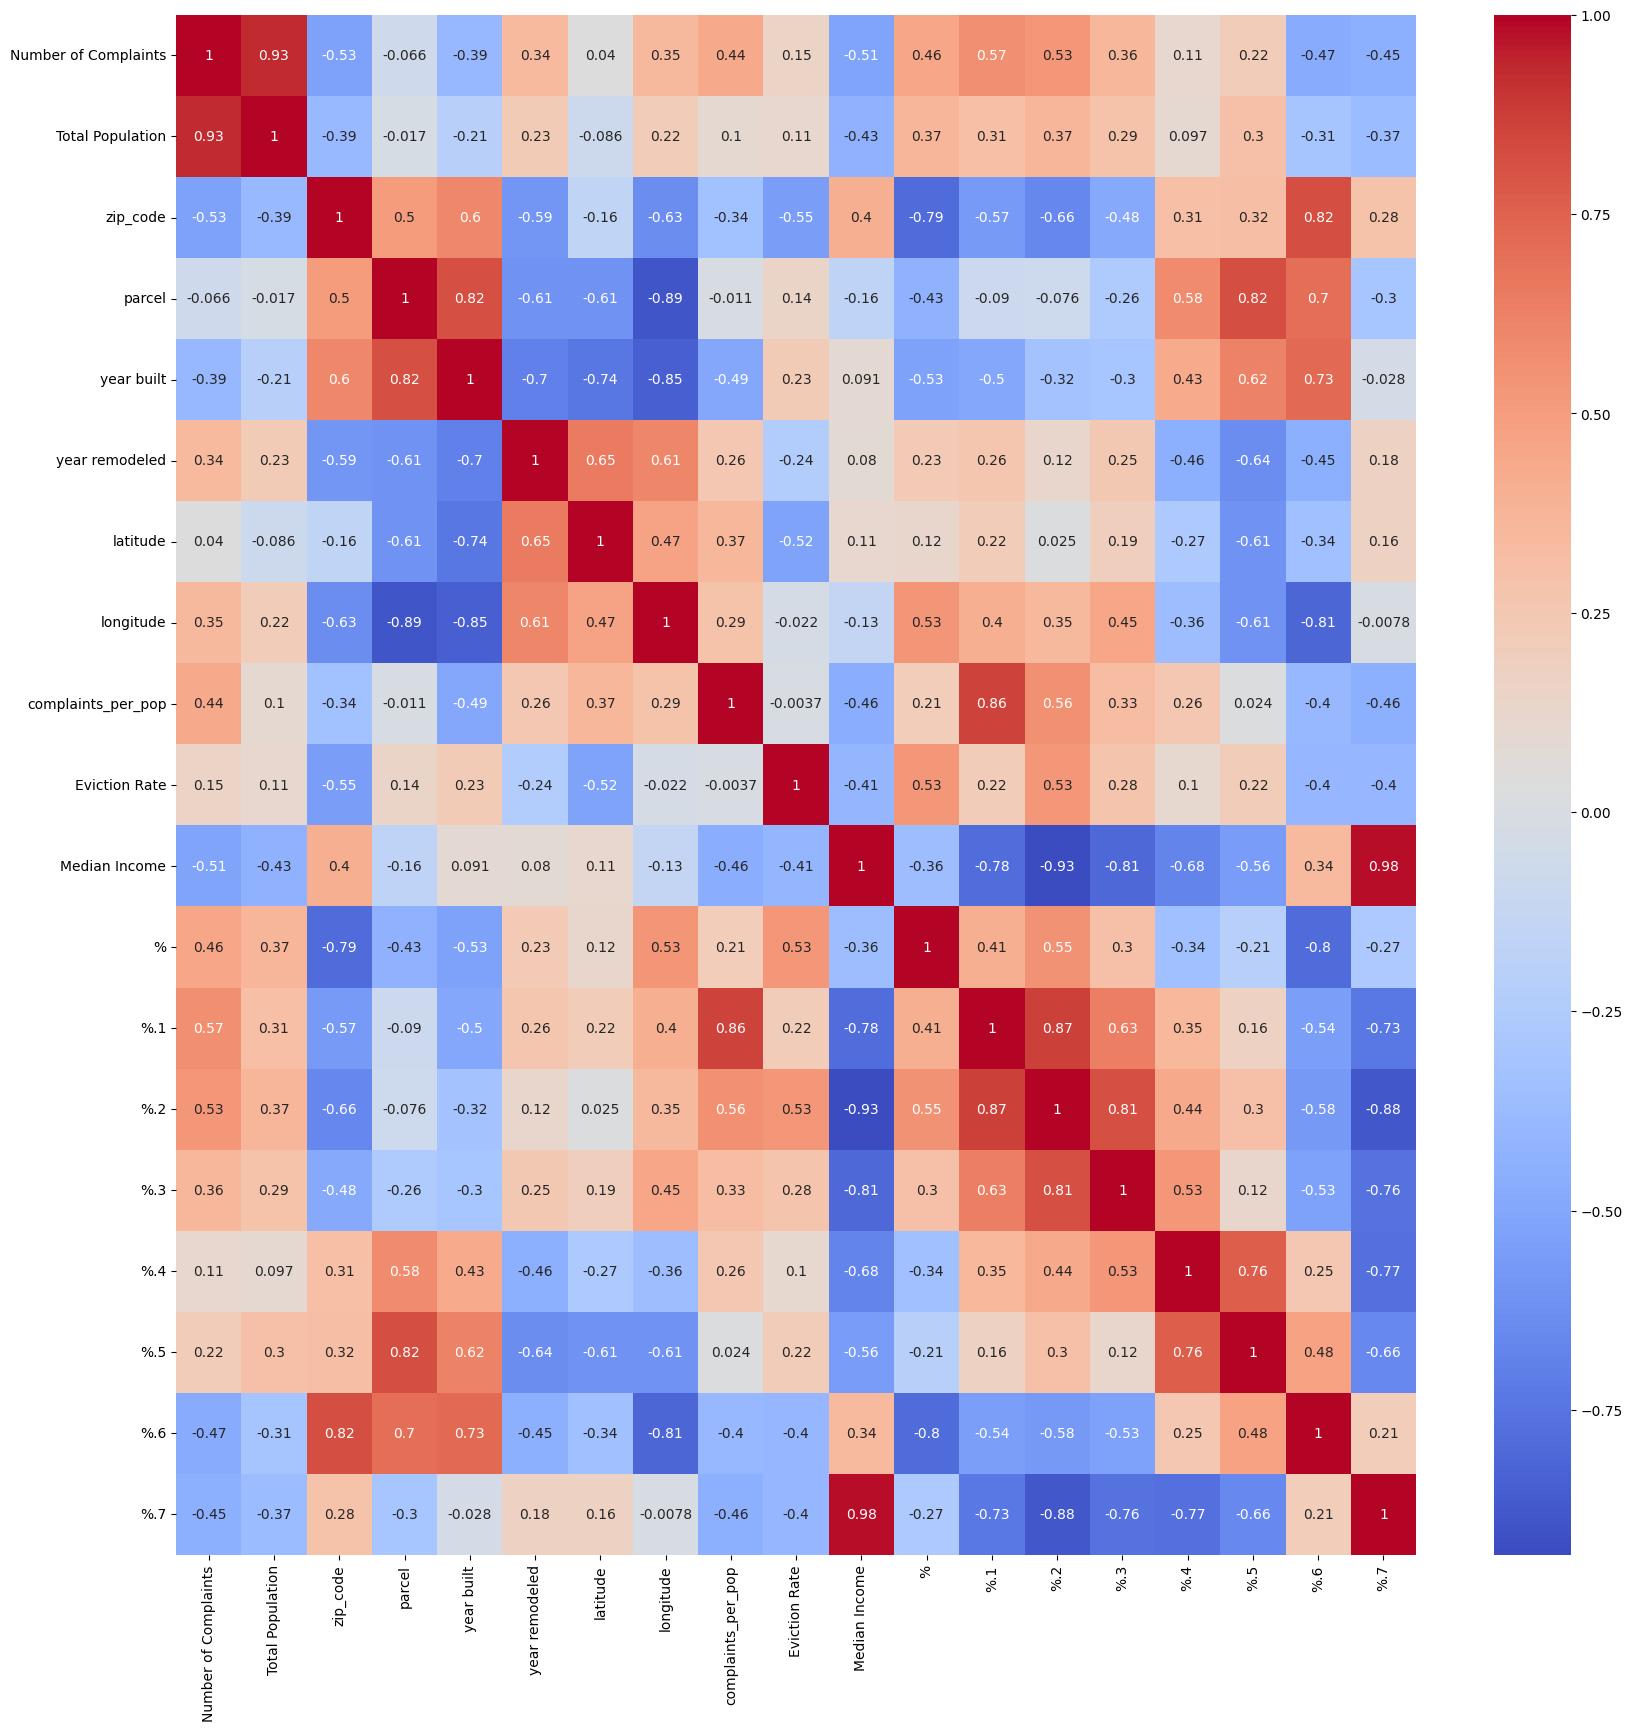

In [51]:
#plot the correlation matrix
corr = per_neighborhood_high_income.corr()
#make the figure bigger
plt.figure(figsize=(20, 20))
sns.heatmap(corr , annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Complaints per Population vs Median Income')

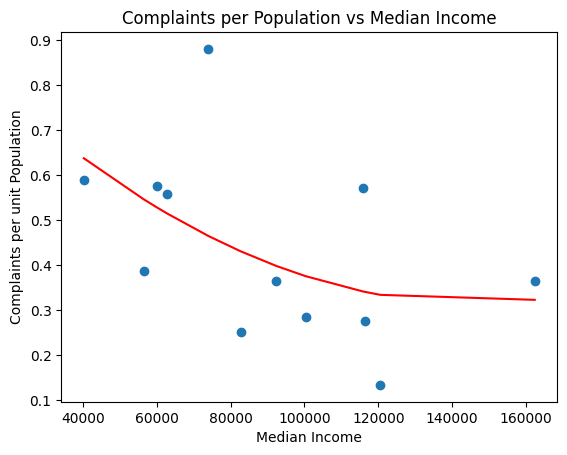

In [69]:
#plot complaints_per_pop vs Median Income

plt.plot(np.unique(per_neighborhood_high_income['Median Income']), np.poly1d(np.polyfit(per_neighborhood_high_income['Median Income'], per_neighborhood_high_income['complaints_per_pop'], 2))(np.unique(per_neighborhood_high_income['Median Income'])), color='red')
#Add the scatter plot
plt.scatter(per_neighborhood_high_income['Median Income'], per_neighborhood_high_income['complaints_per_pop'])
plt.xlabel('Median Income')
plt.ylabel('Complaints per unit Population')
plt.title('Complaints per Population vs Median Income')


Text(0.5, 1.0, 'Complaints per Population vs % of Population with Income below Poverty Level')

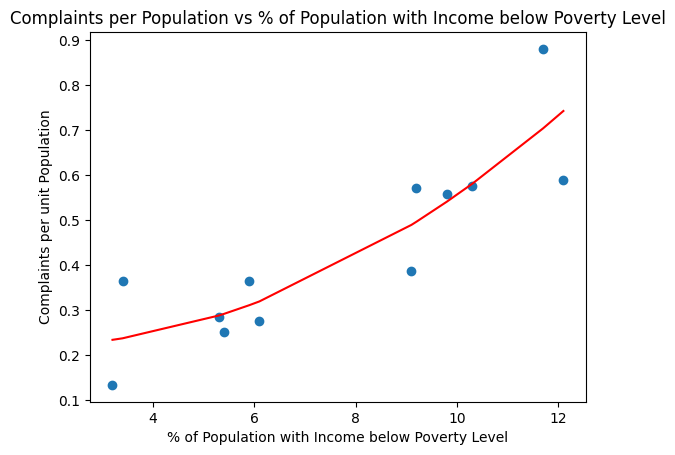

In [70]:
#plot complaints_per_pop vs %.1

plt.plot(np.unique(per_neighborhood_high_income['%.1']), np.poly1d(np.polyfit(per_neighborhood_high_income['%.1'], per_neighborhood_high_income['complaints_per_pop'], 2))(np.unique(per_neighborhood_high_income['%.1'])), color='red')
#Add the scatter plot
plt.scatter(per_neighborhood_high_income['%.1'], per_neighborhood_high_income['complaints_per_pop'])
plt.xlabel('% of Population with Income below Poverty Level')
plt.ylabel('Complaints per unit Population')
plt.title('Complaints per Population vs % of Population with Income below Poverty Level')



Text(0.5, 1.0, 'Eviction Rate vs Median Income')

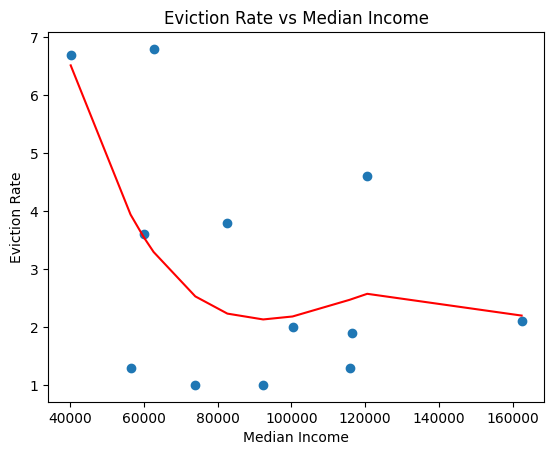

In [71]:
#plot eviction rate vs Median Income

plt.plot(np.unique(per_neighborhood_high_income['Median Income']), np.poly1d(np.polyfit(per_neighborhood_high_income['Median Income'], per_neighborhood_high_income['Eviction Rate'], 3))(np.unique(per_neighborhood_high_income['Median Income'])), color='red')
#Add the scatter plot
plt.scatter(per_neighborhood_high_income['Median Income'], per_neighborhood_high_income['Eviction Rate'])

plt.xlabel('Median Income')
plt.ylabel('Eviction Rate')
plt.title('Eviction Rate vs Median Income')


In [55]:
occupation_data = pd.read_csv("/Users/abhishektiwari/Desktop/sem2/CS506/code/ds-councilor-breadon-bad-landlords2/spring23-team-2/data/2015-2019_neighborhood_tables_2021.12.21/Occupation-Table_csv.csv")
occupation_data

,Neighborhood,Civilian employed population 16 years and over,"Management, business, science, and arts",%,Service,%.1,Sales and office,%.2,"Natural resources, construction, and maintenance",%.3,"Production, transportation, and material moving",%.4
0,Allston,"10,708","5,846",54.6%,"1,960",18.3%,"2,401",22.4%,137,1.3%,364,3.4%
1,Back Bay,"11,226","8,365",74.5%,762,6.8%,"1,852",16.5%,66,0.6%,181,1.6%
2,Beacon Hill,"6,836","5,567",81.4%,288,4.2%,865,12.7%,64,0.9%,52,0.8%
3,Brighton,"36,173","22,048",61.0%,"5,532",15.3%,"5,906",16.3%,"1,080",3.0%,"1,607",4.4%
4,Charlestown,"11,878","7,501",63.2%,"1,230",10.4%,"2,461",20.7%,290,2.4%,396,3.3%
5,Dorchester,"64,516","22,302",34.6%,"17,578",27.2%,"13,665",21.2%,"3,987",6.2%,"6,984",10.8%
6,Downtown,"9,674","6,318",65.3%,"1,281",13.2%,"1,597",16.5%,98,1.0%,380,3.9%
7,East Boston,"27,653","7,374",26.7%,"10,573",38.2%,"4,244",15.3%,"2,513",9.1%,"2,949",10.7%
8,Fenway,"16,880","9,749",57.8%,"2,415",14.3%,"4,084",24.2%,148,0.9%,484,2.9%
9,Hyde Park,"20,214","7,365",36.4%,"4,824",23.9%,"4,339",21.5%,"1,272",6.3%,"2,414",11.9%


In [56]:
#remove % sign from the percentage columns [%, %.1, ... %.4] and convert to float
per_columns = ['%', '%.1', '%.2', '%.3', '%.4']

for i in range(0, len(per_columns)):
    occupation_data[per_columns[i]] = occupation_data[per_columns[i]].str.replace('%', '').astype(float)

    

In [57]:
#merge the occupation data with the per_neighborhood_high_org dataframe

per_neighborhood_high_occupation = pd.merge(per_neighborhood_high_org, occupation_data, left_on='Neighborhood', right_on='Neighborhood')


/var/folders/1b/_v8pf4v97tgfz6kktgdtr2300000gn/T/ipykernel_22470/2137832693.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = per_neighborhood_high_occupation.corr()


<AxesSubplot: >

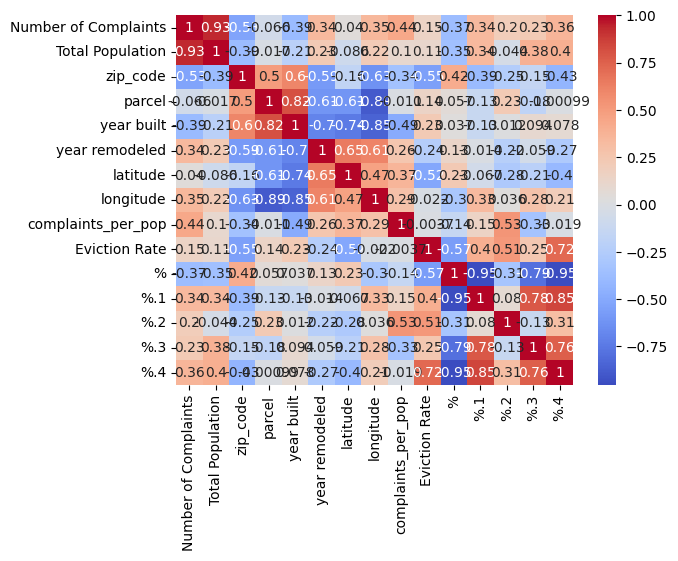

In [58]:
per_neighborhood_high_occupation
#plot the correlation matrix
corr = per_neighborhood_high_occupation.corr()
#make the figure bigger
sns.heatmap(corr , annot=True, cmap='coolwarm')

In [59]:
per_neighborhood_high_occupation

,Neighborhood,Number of Complaints,Total Population,zip_code,parcel,year built,year remodeled,latitude,longitude,complaints_per_pop,...,"Management, business, science, and arts",%,Service,%.1,Sales and office,%.2,"Natural resources, construction, and maintenance",%.3,"Production, transportation, and material moving",%.4
0,Dorchester,73098,126909,2124.0,1.404612e+09,1905.0,2003.0,42.302500,-71.069920,0.575988,...,"22,302",34.6,"17,578",27.2,"13,665",21.2,"3,987",6.2,"6,984",10.8
1,Roxbury,31890,54161,2118.0,9.003170e+08,1900.0,2002.0,42.335794,-71.078355,0.588800,...,"7,785",33.2,"6,702",28.6,"5,093",21.8,985,4.2,"2,851",12.2
2,South Boston,21057,36772,2127.0,6.039050e+08,1900.0,2004.0,42.334510,-71.043790,0.572637,...,"15,803",64.3,"2,516",10.2,"4,902",19.9,603,2.5,764,3.1
3,Brighton,20197,55297,2135.0,2.202320e+09,1920.0,1999.0,42.345871,-71.152430,0.365246,...,"22,048",61.0,"5,532",15.3,"5,906",16.3,"1,080",3.0,"1,607",4.4
4,East Boston,18271,47263,2128.0,1.039720e+08,1900.0,2004.0,42.377680,-71.033500,0.386581,...,"7,374",26.7,"10,573",38.2,"4,244",15.3,"2,513",9.1,"2,949",10.7
5,Allston,16963,19261,2134.0,2.101024e+09,1911.0,1999.0,42.353490,-71.131240,0.880692,...,"5,846",54.6,"1,960",18.3,"2,401",22.4,137,1.3,364,3.4
6,Mattapan,14907,26659,2126.0,1.800730e+09,1920.0,1998.0,42.276050,-71.092850,0.559173,...,"4,010",30.8,"3,850",29.6,"3,018",23.2,609,4.7,"1,518",11.7
7,Jamaica Plain,11293,40867,2130.0,1.102957e+09,1910.0,2000.0,42.313112,-71.108620,0.276335,...,"15,841",64.1,"3,884",15.7,"3,488",14.1,532,2.2,968,3.9
8,Hyde Park,9811,38924,2136.0,1.809424e+09,1925.0,1990.0,42.256640,-71.122010,0.252055,...,"7,365",36.4,"4,824",23.9,"4,339",21.5,"1,272",6.3,"2,414",11.9
9,Roslindale,8534,30021,2131.0,1.903317e+09,1920.0,2001.0,42.284630,-71.126700,0.284268,...,"8,429",49.2,"3,486",20.3,"3,430",20.0,767,4.5,"1,026",6.0


Text(0.5, 1.0, 'Eviction Rate vs % of Population in Production, Transportation, and Material Moving Occupations')

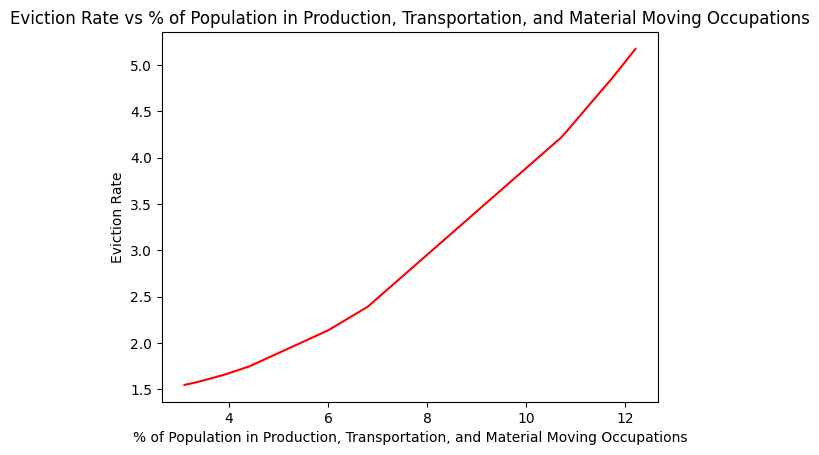

In [60]:
#plot the Eviction Rate vs %.4

plt.plot(np.unique(per_neighborhood_high_occupation['%.4']), np.poly1d(np.polyfit(per_neighborhood_high_occupation['%.4'], per_neighborhood_high_occupation['Eviction Rate'], 2))(np.unique(per_neighborhood_high_occupation['%.4'])), color='red')
plt.xlabel('% of Population in Production, Transportation, and Material Moving Occupations')
plt.ylabel('Eviction Rate')
plt.title('Eviction Rate vs % of Population in Production, Transportation, and Material Moving Occupations')



Text(0.5, 1.0, 'Eviction Rate vs % of Population in Management, Business, Science, and Arts Occupations')

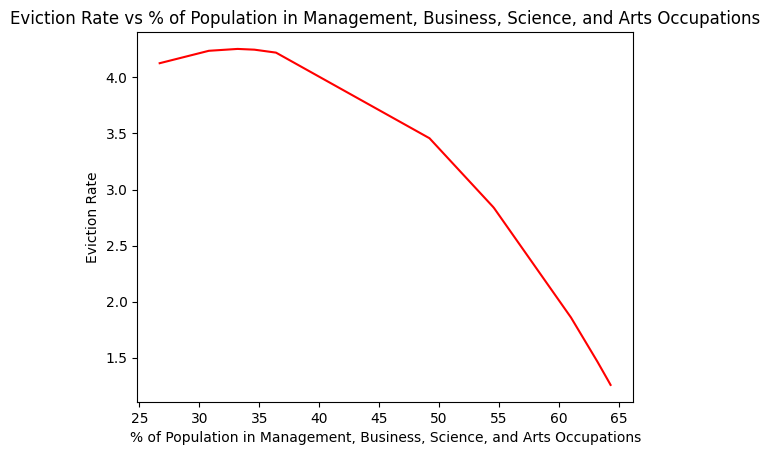

In [61]:
#plot the Eviction Rate vs %

plt.plot(np.unique(per_neighborhood_high_occupation['%']), np.poly1d(np.polyfit(per_neighborhood_high_occupation['%'], per_neighborhood_high_occupation['Eviction Rate'], 2))(np.unique(per_neighborhood_high_occupation['%'])), color='red')
plt.xlabel('% of Population in Management, Business, Science, and Arts Occupations')
plt.ylabel('Eviction Rate')
plt.title('Eviction Rate vs % of Population in Management, Business, Science, and Arts Occupations')


In [62]:
vacancy_data = pd.read_csv("/Users/abhishektiwari/Desktop/sem2/CS506/code/ds-councilor-breadon-bad-landlords2/spring23-team-2/data/2015-2019_neighborhood_tables_2021.12.21/Vacancy Rates_csv.csv")
vacancy_data

,Neighborhood,Total Housing Units:,Vacant Units,% of Total Housing Units,For rent,% of Vacant,"Rented, not occupied",% of Vacant.1,For sale only,% of Vacant.2,"Sold, not occupied",% of Vacant.3,"For seasonal, recreational, or occasional use",% of Vacant.4,Other vacant,% of Vacant.5,Unnamed: 16,Unnamed: 17
0,Allston,"7,052",526,7.5%,225,42.8%,178,33.8%,0,0.0%,20,3.8%,40,7.6%,63,12.0%,NaN,NaN
1,Back Bay,"11,971","2,142",17.9%,275,12.8%,169,7.9%,36,1.7%,61,2.8%,"1,244",58.1%,357,16.7%,NaN,NaN
2,Beacon Hill,"6,148",721,11.7%,76,10.5%,23,3.2%,132,18.3%,0,0.0%,404,56.0%,86,11.9%,NaN,NaN
3,Brighton,"23,854","1,156",4.8%,607,52.5%,249,21.5%,62,5.4%,18,1.6%,71,6.1%,149,12.9%,NaN,NaN
4,Charlestown,"9,573",411,4.3%,118,28.7%,0,0.0%,0,0.0%,33,8.0%,93,22.6%,167,40.6%,NaN,NaN
5,Dorchester,"48,868","4,567",9.3%,740,16.2%,545,11.9%,174,3.8%,"2,131",46.7%,156,3.4%,821,18.0%,NaN,NaN
6,Downtown,"9,966","2,024",20.3%,190,9.4%,306,15.1%,94,4.6%,200,9.9%,"1,011",50.0%,223,11.0%,NaN,NaN
7,East Boston,"17,974","1,409",7.8%,243,17.2%,113,8.0%,78,5.5%,38,2.7%,51,3.6%,886,62.9%,NaN,NaN
8,Fenway,"12,705","1,479",11.6%,347,23.5%,403,27.2%,0,0.0%,77,5.2%,363,24.5%,289,19.5%,NaN,NaN
9,Hyde Park,"13,752",605,4.4%,222,36.7%,0,0.0%,66,10.9%,63,10.4%,10,1.7%,244,40.3%,NaN,NaN


In [63]:
#remove % sign from the percentage columns [% of Vacant, % of Vacant.1, ... % of Vacant.5] and convert to float
per_columns = ['% of Vacant', '% of Vacant.1', '% of Vacant.2', '% of Vacant.3', '% of Vacant.4', '% of Vacant.5']

for i in range(0, len(per_columns)):
    vacancy_data[per_columns[i]] = vacancy_data[per_columns[i]].str.replace('%', '').astype(float)
    

In [64]:
#merge the vacancy data with the per_neighborhood_high_org dataframe

per_neighborhood_high_vacancy = pd.merge(per_neighborhood_high_org, vacancy_data, left_on='Neighborhood', right_on='Neighborhood')

#drop the Unnanmed column
per_neighborhood_high_vacancy = per_neighborhood_high_vacancy.drop(columns=['Unnamed: 16', 'Unnamed: 17'])

/var/folders/1b/_v8pf4v97tgfz6kktgdtr2300000gn/T/ipykernel_22470/1371397355.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = per_neighborhood_high_vacancy.corr()


<AxesSubplot: >

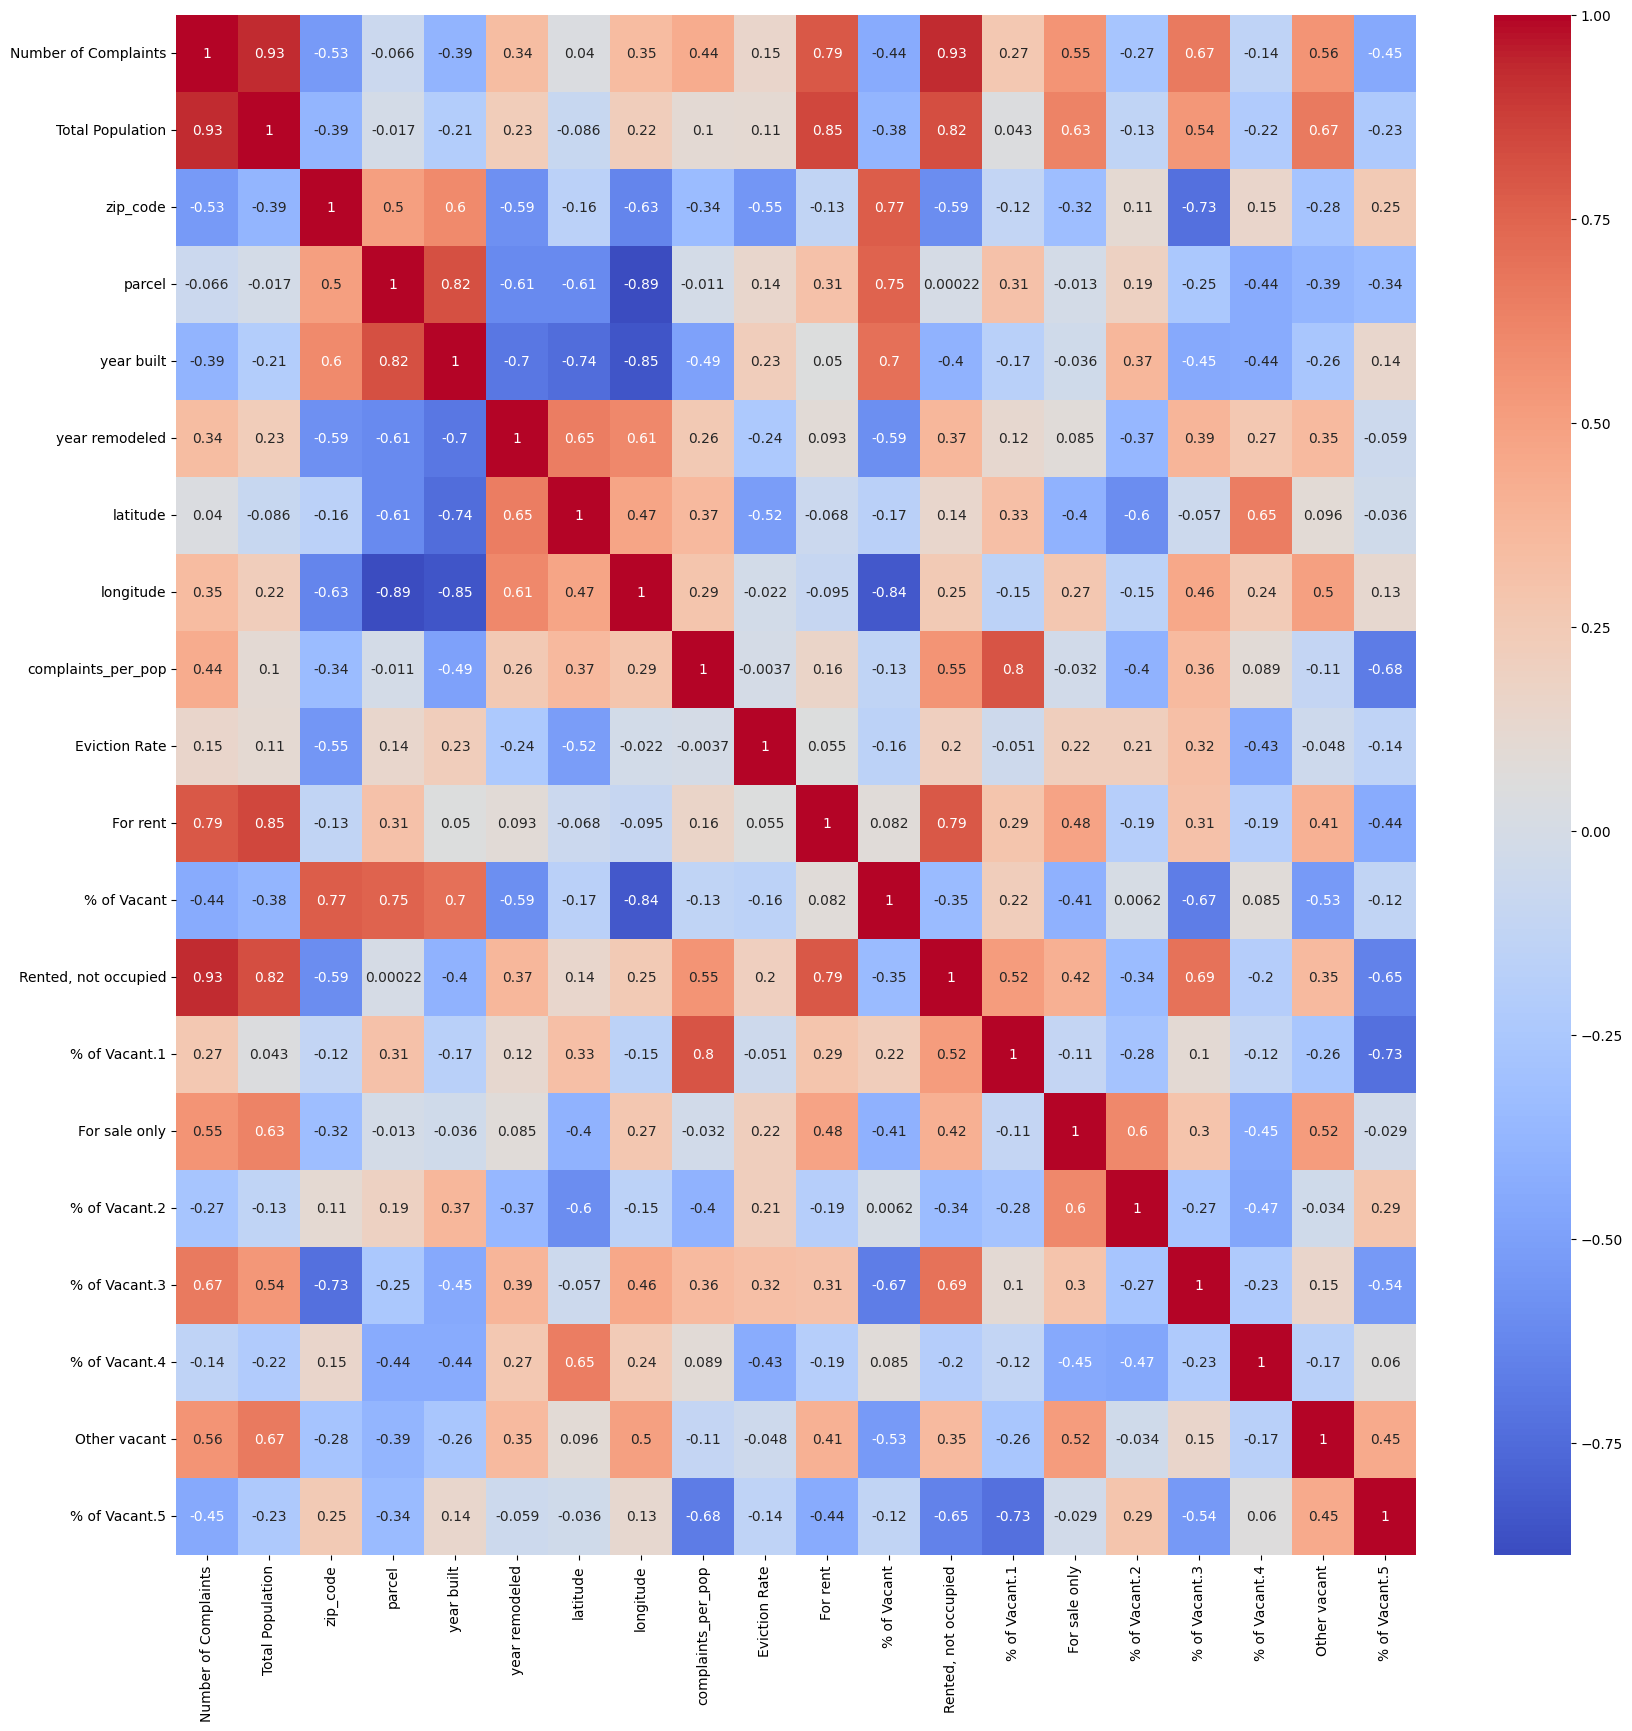

In [65]:
#plot the correlation matrix
corr = per_neighborhood_high_vacancy.corr()
#make the figure bigger
plt.figure(figsize=(20, 20))
sns.heatmap(corr , annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Complaints per Population vs % of Housing Units that are rented but not occupied')

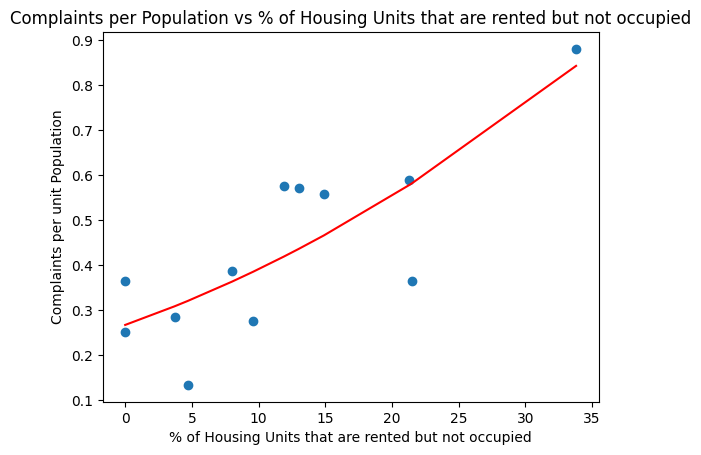

In [72]:
#Plot the % of Vacant.1 vs complaints_per_pop

plt.plot(np.unique(per_neighborhood_high_vacancy['% of Vacant.1']), np.poly1d(np.polyfit(per_neighborhood_high_vacancy['% of Vacant.1'], per_neighborhood_high_vacancy['complaints_per_pop'], 2))(np.unique(per_neighborhood_high_vacancy['% of Vacant.1'])), color='red')
#Add the scatter plot
plt.scatter(per_neighborhood_high_vacancy['% of Vacant.1'], per_neighborhood_high_vacancy['complaints_per_pop'])
plt.xlabel('% of Housing Units that are rented but not occupied')
plt.ylabel('Complaints per unit Population')
plt.title('Complaints per Population vs % of Housing Units that are rented but not occupied')
